Step1:Reading a wav file 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import wave, sys

path = 'A_8k.wav'   
modulator = wave.open(path)
    
signal = modulator.readframes(-1)
signal = np.frombuffer(signal, dtype ="int16")
     
  
f_rate = modulator.getframerate()

time_1 = np.linspace(
        0, # start
        len(signal) / f_rate,
        num = len(signal)
    )
 
plt.figure(1)
     
    
plt.title("Sound Wave")
plt.xlabel("Time")
plt.plot(time_1, signal)
plt.show()
    
 
   




ModuleNotFoundError: No module named 'matplotlib'

2.Dividing the audio file into small segments a and storing in to a  list

In [2]:
from pydub import AudioSegment
from pydub.utils import make_chunks

myaudio = AudioSegment.from_file("newSong.wav" , "wav") 
chunk_length_ms = 128 # pydub calculates in millisec
chunks = make_chunks(myaudio, chunk_length_ms) #Make chunks of 10 milli sec
list_segments=[]
for i in range(len(chunks)):
    list_segments.append(np.array(chunks[i].get_array_of_samples()))
    
print(len(list_segments))


#print(list_segments[0])



40


/home/seshu/Seshu/envs/IISCPROJECT/lib/python3.7/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [3]:
np.fft.fft(list_segments[0], n=1000, axis=-1, norm=None)

array([-3.87600000e+03+0.00000000e+00j,  2.75166375e+03+3.01316407e+02j,
       -1.74155683e+03+6.97718585e+02j,  2.67950328e+03+7.79245479e+02j,
       -9.46459316e+02-2.97321770e+03j, -1.76691692e+03-1.96709424e+03j,
       -2.66761661e+03-5.18980837e+02j, -2.13862121e+03+5.75508118e+02j,
       -2.20651091e+03+7.42835418e+02j,  1.14651992e+03+2.50712453e+03j,
        1.44881648e+03+2.87181292e+03j,  1.12366909e+03-6.41623609e+03j,
        4.19276513e+03-1.12811354e+04j, -4.67850062e+04-3.90021149e+03j,
        5.20733292e+03+4.97492724e+04j,  3.05045797e+04-6.95950869e+03j,
       -9.03597284e+03-1.24757305e+04j, -1.13233519e+04-4.20850507e+03j,
       -6.48485909e+03+2.31957552e+03j, -1.23202478e+04-1.67591079e+03j,
       -1.34730468e+04+1.40082246e+04j, -6.77970442e+03+1.37142135e+04j,
        2.75019731e+04+1.25041756e+04j,  1.36763382e+04+3.97989038e+03j,
       -3.94638286e+02-3.61867007e+04j,  1.32038568e+04+6.29529823e+03j,
       -5.44678115e+04-1.32999065e+04j,  3.37628755

In [5]:
list_fft=[]
for i in list_segments:
    list_fft.append(np.fft.fft(i, n=1000, axis=-1, norm=None))
print(len(list_fft))

40


In [6]:
#print(len(list_fft[0]))

def frequency():
    frequency=[]
    for i in range(0,500):
        frequency.append((i*8*1000)/1000)
    return frequency
        
    

In [7]:
#len(frequency())
#len(a[500:])
#len(list_fft)

In [8]:
list_fft1=[]
for i in range(0,len(list_fft)):
    list_fft1.append(list_fft[i][500:])
#plt.plot(frequency,list_fft1[0])


In [9]:
#np.shape(frequency())
#np.shape(list_fft1[0])
#len(list_fft[i][500:])

In [10]:
print(len((list_fft1[0])))
print(len(frequency()))

500
500


In [11]:
#len(frequency())
len(list_fft1[0])

500

/home/seshu/Seshu/envs/IISCPROJECT/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


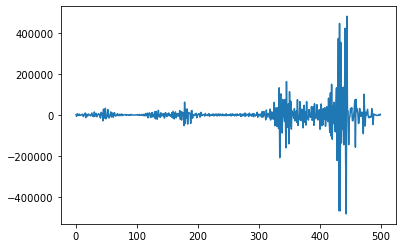

In [12]:
plt.plot(list_fft1[0])

In [13]:
fre=frequency()
print(len(fre))

500


In [14]:
#print(len(list_fft[0]))
#print(len(fre))

/home/seshu/Seshu/envs/IISCPROJECT/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


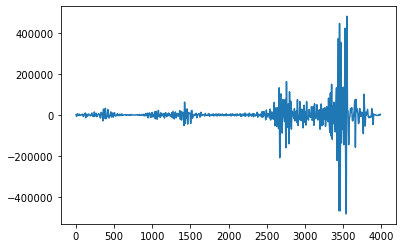

In [15]:
plt.plot(fre,list_fft1[0])
plt.show()

<h6>Function for finding max_component in DTFT at which  frequency <h6>

In [16]:
#function for finding maximum component and at which frequency
def max_comp(dft,frequency):
    temp_dft=list(dft[0:500])
    max_dft=max(temp_dft)
    index_dft=temp_dft.index(max_dft)
    max_freq=frequency[index_dft]
    return max_dft,max_freq
    

In [17]:

for i in range(0,len(list_fft)):
    m,freq=max_comp(list_fft[i],fre)
   
    freq=freq
    
    print(abs(m),freq)

600986.9688214246 448.0
550527.3257415118 480.0
1460684.5916992452 552.0
341274.83527326747 392.0
379425.8576196702 640.0
472843.22770668485 544.0
463171.9472718778 264.0
235923.8526011686 368.0
470028.7206516817 552.0
493956.98840948223 864.0
25713.851614519528 216.0
156907.3715803516 368.0
608369.931507846 552.0
390594.10420919757 592.0
226672.89291000442 440.0
238614.6503402507 368.0
104540.8270874244 344.0
964134.4146785248 432.0
483065.2635078638 424.0
653925.6706508835 504.0
137449.0292531224 416.0
183720.39992182524 232.0
131346.13592342474 296.0
105014.392706699 408.0
1417353.7976780664 608.0
767989.6202551816 592.0
227165.77983860046 464.0
78095.07036845436 416.0
1239301.7507518497 664.0
1027522.7921350696 504.0
468415.73911312316 432.0
93998.25559948102 392.0
106741.13610589318 2336.0
7255.0 0.0
402170.197743583 472.0
543802.3075121798 480.0
15507.053864111589 1472.0
248055.8551706847 480.0
773729.555357253 520.0
119455.9048254953 672.0


In [18]:
def energy(fft_values):
    energy=0
    
    for i in fft_values:
        energy+=(abs(i)**2)
    return energy

In [19]:
def mul(energy,frequency):
    mul=[]
    for i in range(min(len(energy),len(frequency))):
        mul.append(energy[i]*frequency[i])
    return mul
        

In [20]:
def wave_length(frequ):
    if (frequ>=0 and frequ<200):
        wavel=400
        
    elif(frequ>200 and frequ<400):
        wavel=415
    elif(frequ>400 and frequ<600):
        wavel=430
        
    elif(frequ>600 and frequ<800):
        wavel=445
    elif(frequ>800 and frequ<1000):
        wavel=460
    elif(frequ>1000 and frequ<1200):
        wavel=475
    
    
    elif(frequ>1200 and frequ<1400):
        wavel=490
    elif(frequ>1400 and frequ<1600):
        wavel=505
    elif(frequ>1600 and frequ<1800):
        wavel=520
    elif(frequ>1800 and frequ<2000):
        wavel=535
    elif(frequ>2000 and frequ<2200):
        wavel=550
    
    elif(frequ>2200 and frequ<2400):
        wavel=565
    elif(frequ>2400 and frequ<2600):
        wavel=580
    elif(frequ>2600 and frequ<2800):
        wavel=595
    elif(frequ>2800 and frequ<3000):
        wavel=610
    elif(frequ>3000 and frequ<3200):
        wavel=625
    
    elif(frequ>3200 and frequ<3400):
        wavel=640
    elif(frequ>3400 and frequ<3600):
        wavel=655
    elif(frequ>3600 and frequ<3800):
        wavel=670
    elif(frequ>3800 and frequ<4000):
        wavel=685
    return(wavel)
    

In [21]:
def get_comp(main_fft,freq_values):
    final_comps=[]
    
    for fft_1024 in main_fft:
        energies=[]
        frequencies=[]
        #print(len(fft_1024))
        
        for i in range(19):
        
            fft_50=fft_1024[(i*25):(i+1)*25]
                #print(len(fft_50))
            max_dft,max_freq=max_comp(fft_50,freq_values)
            max_freq=(i*25)+max_freq
            energies.append(energy(fft_50)+0.00000001)
            frequencies.append(wave_length(max_freq))
        print(energies)
        print(frequencies)
         
        final_comp=sum(mul(energies,frequencies))/sum(energies)
        final_comps.append(final_comp)
        
        
    return final_comps
        

In [22]:
#print(result)

In [26]:
for i in range(len(list_fft)):
    result=get_comp(list_fft1,fre)

[1257268105.713751, 8500899989.721672, 4605014434.666468, 141297546.18802178, 1894155472.2248478, 6195749071.57295, 7564641793.855284, 28783367398.70705, 1706437162.5098455, 789779347.9924762, 905236772.3026513, 2267566741.3025393, 12479199671.727533, 486634057068.00037, 68529106375.321205, 44418825594.5269, 158648166227.60745, 2692596970147.225, 153662529949.20584]
[400, 415, 400, 400, 415, 415, 415, 400, 415, 415, 430, 430, 430, 430, 415, 415, 430, 430, 445]
[6230858382.979588, 9673503433.600655, 3504681352.3559566, 1667578964.795132, 2669227886.3778477, 6129407871.723407, 16338561813.24661, 12778622477.59001, 1955603844.7537599, 2646752500.181361, 4083540429.927946, 3891295007.2264204, 8978270439.88831, 34140431906.714985, 391188937829.4912, 697514384392.3027, 838172998047.6146, 2212822122949.415, 374873674878.7687]
[400, 400, 415, 400, 415, 400, 415, 415, 415, 415, 415, 430, 415, 415, 430, 430, 430, 430, 430]
[106048178360.32777, 38660034738.69432, 3891748422.19465, 1884304582.9441

[220968804.12133613, 234487843.19646004, 481237740.8609594, 144694052.62444994, 215320630.28006735, 244407002.95283902, 502798761.1673091, 485334643.5615191, 446468714.97991294, 274234979.95800686, 864078939.435483, 2528462255.631352, 2411560127.818513, 3390713566.9803624, 3004545678.0278826, 1801419845.137057, 1825261774.0074077, 1296301032.0342054, 643218672.4554106]
[400, 400, 400, 415, 415, 415, 415, 415, 415, 415, 415, 415, 430, 415, 430, 430, 430, 430, 430]
[134752072.39872855, 192113436.73107797, 212347786.80836254, 165032264.84173957, 139717887.52725613, 398968750.27897984, 344713898.6723385, 155825946.9388008, 308202828.4105698, 562507408.6078373, 486046026.9110464, 1425194217.8526735, 32365246018.44044, 109907208093.0988, 389629016758.197, 401044311697.2528, 121594205787.46317, 625240337247.829, 281762479731.0871]
[400, 400, 415, 400, 415, 415, 415, 415, 415, 415, 415, 430, 430, 415, 430, 430, 430, 430, 430]
[4688072708.391595, 6530700125.706148, 3316668069.118531, 3439812994

[6230858382.979588, 9673503433.600655, 3504681352.3559566, 1667578964.795132, 2669227886.3778477, 6129407871.723407, 16338561813.24661, 12778622477.59001, 1955603844.7537599, 2646752500.181361, 4083540429.927946, 3891295007.2264204, 8978270439.88831, 34140431906.714985, 391188937829.4912, 697514384392.3027, 838172998047.6146, 2212822122949.415, 374873674878.7687]
[400, 400, 415, 400, 415, 400, 415, 415, 415, 415, 415, 430, 415, 415, 430, 430, 430, 430, 430]
[106048178360.32777, 38660034738.69432, 3891748422.19465, 1884304582.94417, 12900878564.243242, 39197715609.13032, 85678387816.27386, 200239677923.0163, 47559244816.560524, 22873294902.514477, 43464658550.81867, 534205508197.10535, 859382597160.8241, 551832668392.3037, 1402672366998.477, 639668401977.3379, 6015942564769.317, 13036950842150.615, 628587571093.7161]
[400, 400, 400, 415, 415, 415, 415, 415, 415, 415, 430, 430, 415, 430, 415, 430, 430, 430, 430]
[15198212503.030172, 1007531930.034865, 1541653763.0772715, 713044616.186714

[3210593850.057286, 3767073233.722524, 2795518574.3084764, 2897852327.4855256, 4221239553.611399, 11126342169.240885, 22199870714.06034, 38170102112.0774, 16029780579.51783, 16658001509.038744, 31287302155.889164, 14959417474.12634, 3383144485.6601033, 2543616931.3620334, 3816470458.2959166, 9544549064.956684, 16984207516.4042, 191627541420.80664, 118962665470.07759]
[400, 400, 415, 400, 400, 400, 415, 415, 415, 415, 430, 430, 415, 430, 430, 430, 430, 430, 430]
[18557697511.9404, 37822147809.705284, 5918989991.236989, 1605825507.6965692, 989095158.4770188, 574933438.7638735, 940987121.1671767, 1845519801.6844134, 4272282386.446406, 99295040102.96773, 334512777670.24243, 2191773545788.468, 2681486797869.236, 529577645153.5142, 198827434321.98273, 110789314288.20859, 463480178854.8079, 6143516044741.821, 367515054570.8268]
[400, 400, 400, 400, 400, 415, 415, 415, 415, 430, 415, 415, 415, 430, 415, 430, 430, 430, 430]
[103272110.04971747, 1230249735.3340602, 2786631793.8430524, 1687089486

[220968804.12133613, 234487843.19646004, 481237740.8609594, 144694052.62444994, 215320630.28006735, 244407002.95283902, 502798761.1673091, 485334643.5615191, 446468714.97991294, 274234979.95800686, 864078939.435483, 2528462255.631352, 2411560127.818513, 3390713566.9803624, 3004545678.0278826, 1801419845.137057, 1825261774.0074077, 1296301032.0342054, 643218672.4554106]
[400, 400, 400, 415, 415, 415, 415, 415, 415, 415, 415, 415, 430, 415, 430, 430, 430, 430, 430]
[134752072.39872855, 192113436.73107797, 212347786.80836254, 165032264.84173957, 139717887.52725613, 398968750.27897984, 344713898.6723385, 155825946.9388008, 308202828.4105698, 562507408.6078373, 486046026.9110464, 1425194217.8526735, 32365246018.44044, 109907208093.0988, 389629016758.197, 401044311697.2528, 121594205787.46317, 625240337247.829, 281762479731.0871]
[400, 400, 415, 400, 415, 415, 415, 415, 415, 415, 415, 430, 430, 415, 430, 430, 430, 430, 430]
[4688072708.391595, 6530700125.706148, 3316668069.118531, 3439812994

[18557697511.9404, 37822147809.705284, 5918989991.236989, 1605825507.6965692, 989095158.4770188, 574933438.7638735, 940987121.1671767, 1845519801.6844134, 4272282386.446406, 99295040102.96773, 334512777670.24243, 2191773545788.468, 2681486797869.236, 529577645153.5142, 198827434321.98273, 110789314288.20859, 463480178854.8079, 6143516044741.821, 367515054570.8268]
[400, 400, 400, 400, 400, 415, 415, 415, 415, 430, 415, 415, 415, 430, 415, 430, 430, 430, 430]
[103272110.04971747, 1230249735.3340602, 2786631793.8430524, 1687089486.6646266, 261538624.37625745, 259339526.68839735, 552586156.1581829, 2589638709.7297025, 1832213095.9207053, 1614991822.5609581, 616998864.0605708, 513499880.27362275, 625279081.3699157, 1681276187.2278337, 8108539484.174697, 376056394446.57336, 1693321251100.8875, 2429264050504.3574, 293509734405.5768]
[400, 400, 400, 400, 400, 400, 415, 415, 415, 415, 415, 430, 415, 415, 430, 430, 430, 445, 430]
[28249288613.21558, 100139651615.10562, 57745249180.703026, 21443

[8575557658.533142, 30470753799.96187, 5673945610.978372, 3827851794.176771, 2442797264.558932, 9378724712.713903, 12185753399.715595, 20623453860.826782, 81365355721.03987, 16309205054.909534, 1897691691.4507642, 1454459624.0856771, 3600171782.3132057, 800055249.6749554, 608735724.5656503, 2065738399.9006994, 2150622109.872752, 33283436994.82257, 210510927003.08054]
[400, 400, 400, 415, 400, 400, 415, 415, 415, 415, 415, 415, 415, 415, 430, 430, 430, 445, 430]
[77600410031.57391, 97489499528.06851, 19626467220.0777, 8768888804.653643, 3950795717.5088663, 6086799259.467531, 19203335215.605965, 123145197670.94177, 73579509294.55075, 67780318805.80296, 319654768830.1712, 562443001174.6495, 173890092767.50674, 51797278094.889626, 47486393364.73811, 395684147504.2743, 5274698850419.193, 1364183298681.676, 200026392487.90155]
[400, 400, 400, 415, 415, 415, 415, 415, 415, 415, 430, 415, 415, 415, 430, 430, 430, 430, 445]
[30365266399.942238, 56824213890.51218, 31651041340.150146, 23992848234

[2146673701.9819527, 1838165243.630729, 2529924658.843648, 3572950602.24074, 6349742433.4738455, 5382132456.90579, 9980196272.437714, 27528734048.974854, 84232856994.19905, 10669186122.937914, 2860749891.05492, 1519405549.027651, 508640294.66641587, 28979462.96789676, 57944831.65057791, 83581695.47874148, 113559847.90134527, 205968027.95349756, 81979857.50609298]
[400, 400, 415, 415, 400, 415, 415, 415, 415, 415, 415, 415, 415, 430, 430, 430, 430, 430, 445]
[321366.8358389608, 235153.0417628212, 258469.7899852589, 267413.73504022905, 218992.05570834727, 157477.80058082176, 274000.3515423161, 327428.2989509889, 383444.4098387621, 505108.7933259337, 390623.5341955167, 880570.0357866681, 716854.4119517722, 522388.7274027384, 1515203.6106406741, 717764.1097626735, 1484708.0522538219, 5176796.690583154, 131885601.46523133]
[400, 415, 400, 400, 400, 415, 415, 415, 415, 415, 415, 415, 430, 415, 430, 430, 430, 430, 445]
[740852186.144835, 1165601545.040947, 1619934029.820448, 8409809017.135192

In [27]:
print(result)

[429.77382962298094, 429.564190464281, 428.164778948292, 426.5283972098216, 428.6654189460211, 429.4916352273045, 425.28531419112653, 427.0566003400102, 428.7517358356257, 428.9704991918506, 411.78418565128527, 429.48929889908817, 427.1643502224737, 424.2108449210246, 426.5563410380112, 425.0069652280592, 425.6334042434644, 423.69677650133406, 437.4962241213545, 428.3549517903221, 438.0997817892598, 429.8915879972539, 420.0750338902792, 422.5586449278333, 427.8394770499248, 426.45116604891376, 429.8884111392169, 433.6335151473513, 428.8290519253925, 429.5626884519801, 429.21534349074216, 422.42900401723284, 414.0906909048447, 442.93190663729024, 429.6627671103579, 426.29076160422557, 422.17014028215885, 429.1340636156449, 429.7201262105514, 434.6394755515284]


In [28]:
len(result)

40

In [29]:

def wave2rgb(wave):
    # This is a port of javascript code from  http://stackoverflow.com/a/14917481
    gamma = 0.8
    intensity_max = 1
 
    if wave < 400:
        red, green, blue = 0, 0, 0
    elif wave < 405:
        red = -(wave - 440) / (440 - 380)
        green, blue = 0, 1
    elif wave < 410:
        red = 0
        green = (wave - 440) / (490 - 440)
        blue = 1
    elif wave < 415:
        red, green = 0, 1
        blue = -(wave - 510) / (510 - 490)
    elif wave < 420:
        red = (wave - 510) / (580 - 510)
        green, blue = 1, 0
    elif wave < 425:
        red = 1
        green = -(wave - 645) / (645 - 580)
        blue = 0
    elif wave <= 430:
        red, green, blue = 1, 0, 0
    else:
        red, green, blue = 0, 0, 0
 
    # let the intensity fall of near the vision limits
    if wave < 380:
        factor = 0
    elif wave < 420:
        factor = 0.3 + 0.7 * (wave - 380) / (420 - 380)
    elif wave < 700:
        factor = 1
    elif wave <= 780:
        factor = 0.3 + 0.7 * (780 - wave) / (780 - 700)
    else:
        factor = 0
 
    def f(c):
        if c == 0:
            return 0
        else:
            return intensity_max * pow (c * factor, gamma)
 
    return f(red), f(green), f(blue)

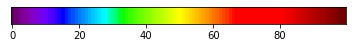

In [30]:

N = 100
image = np.zeros((5,N,3))
 
for i in range(0, 5):
    for j in range(0, N):
        start = 380
        end = 780
        wave = j * (end-start)/N + start
        image[i][j] = wave2rgb(wave)
 
ax = plt.axes()
ax.get_yaxis().set_visible(False)
plt.imshow(image)
plt.show()

In [31]:
print(wave)

776.0


In [32]:
wavl=[]
for i in range(len(result)):
    wavl.append(wave_length(result[i]))
    

In [33]:
len(wavl)

40

In [34]:
for i in wavl:
    print(i)

430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430
430


In [35]:
#import random
#result(random.randrange(4700))

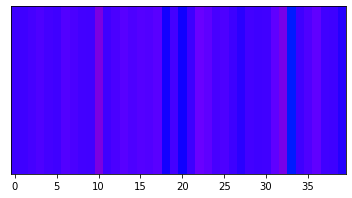

In [36]:

N = len(list_fft)
image = np.zeros((20,N,3))
#print(image)
for i in range(0, 20):
    for j in range(0, N):
        start = 380
        end = 780
        #wave = j * (end-start)/N + start
        #image[i][j] = wave2rgb(wave)
        wave = result
        image[i][j] = wave2rgb(wave[j])
 
ax = plt.axes()
ax.get_yaxis().set_visible(False)
plt.imshow(image)
plt.show()